# Extract RGB from PAD Columns

<font color='red'>Warning!</font> This notebook is a work in progress.

This notebook describes the process of extracting RGB colors from a PAD. Please remember to <font color='green'>change the settings</font> in the [User Inputs](#User-Inputs) section.

## Contents

- [User Inputs](#User-Inputs)
- [Imports](#Imports)
- [Load Images](#Load-Images)
- [Manual Box Placement](#Manual-Box-Placement)
- [Sample](#Sample)
- [Export to CSV](#Export-to-CSV)
- [Plot Color Changes Over Time](#Plot-Color-Changes-Over-Time)

## User Inputs

Change these variables.

In [1]:
INPUT_DIRECTORY = r"C:\Users\your_user_name\your_folder_containing_images"
OUTPUT_DIRECTORY = r"C:\Users\your_user_name\output_folder_that_doesnt_already_have_to_exist"

INPUT_DIRECTORY = r"C:\Users\ericc\projects\padtools\raw_images"
OUTPUT_DIRECTORY = r"C:\Users\ericc\projects\padtools\output_folder_that_doesnt_already_have_to_exist"

OUTPUT_PER_COLUMN_CSV = "columns.csv"
OUTPUT_PER_FILE_CSV = "summary.csv"

BOX_WIDTH = 50
BOX_HEIGHT = 600
NUM_BOXES = 12
OFFSET_TOP = 1300
OFFSET_LEFT = 540
HORIZONTAL_SPACER = 109

PADDING_USED_ON_SIDES_OF_PLOTS = 15

# Note that this method sucks and doesn't work at all.
# I didn't even bother to write all the code.
# DO_BACKGROUND_SUBTRACTION = False
# OUTPUT_DIRECTORY_WITH_BACKGROUND_SUBTRACTION = r"C:\Users\ericc\projects\padtools\background_subtraction" # Not actually used (yet).

## Imports

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pathlib
from datetime import datetime

In [3]:
%matplotlib inline

## Load Images

In [4]:
def plot_image(
    image,
    title=None
):
    plt.figure()
    if title:
        plt.title(title)
    plt.imshow(image)

In [5]:
output_dir = pathlib.Path(OUTPUT_DIRECTORY)
if not output_dir.is_dir():
    os.mkdir(str(output_dir))
    print("Created: {}".format(str(output_dir)))
else:
    print("Already exists: {}".format(str(output_dir)))

output_per_column_csv_path = pathlib.Path(os.path.join(os.getcwd(), OUTPUT_DIRECTORY, OUTPUT_PER_COLUMN_CSV))
print("Column output CSV: {}".format(str(output_per_column_csv_path)))
output_per_file_csv_path = pathlib.Path(os.path.join(os.getcwd(), OUTPUT_DIRECTORY, OUTPUT_PER_FILE_CSV))
print("Summary output CSV: {}".format(str(output_per_file_csv_path)))

Already exists: C:\Users\ericc\projects\padtools\output_folder_that_doesnt_already_have_to_exist
Column output CSV: C:\Users\ericc\projects\padtools\output_folder_that_doesnt_already_have_to_exist\columns.csv
Summary output CSV: C:\Users\ericc\projects\padtools\output_folder_that_doesnt_already_have_to_exist\summary.csv


Let this take care of the rest.

In [6]:
image_filenames = [pathlib.Path(os.path.join(os.getcwd(), INPUT_DIRECTORY, x)) for x in os.listdir(INPUT_DIRECTORY) if x.endswith('.jpg')]
print("Found these files:\n{}".format("\n".join([str(x) for x in image_filenames])))

Found these files:
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160509.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160532.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160600.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160630.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160700.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160730.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160801.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160830.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160900.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_160930.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_161000.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_161031.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_161101.jpg
C:\Users\ericc\projects\padtools\raw_images\IMG_20190313_161130.jpg
C:\Users\ericc\projects\padto

## Rectification

In [7]:
def find_contours(
    image,
    verbose=False
):
    blurred_image = cv2.blur(image, (2, 2))
    edges = cv2.Canny(blurred_image, 40, 150)
    edges_2, contours, hierarchy = cv2.findContours(
        edges,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE
    )
    black_and_white_edges = cv2.cvtColor(
        edges_2,
        cv2.COLOR_GRAY2RGB
    )
    if verbose:
        plot_image(blurred_image, title="Blurred")
        plot_image(edges, title="Edges")
        plot_image(edges_2, title="OpenCV is dumb. Why does it return the same thing?")
        plot_image(black_and_white_edges, title="Black and White Edges")
    return black_and_white_edges, contours, hierarchy

In [8]:
def select_markers(contours, hierarchy, verbose=False, very_verbose=False):
    """This returns nothing?"""
    markers = []
    for i, contour in enumerate(contours):
        if very_verbose:
            print(f"i: {i}")
            print(f"hierarchy[0][i][2]:\n{hierarchy[0][i][2]}")
            print(f"contour:\n{contour}")
        depth = 0
        while hierarchy[0][i][2] != -1:
            i = hierarchy[0][i][2]
            # print(f"other contour:\n{contour}")
            depth += 1
        if very_verbose:
            print(f"depth: {depth}")
        if hierarchy[0][i][2] != -1:
            depth += 1
        if depth >= 3: # Sometimes 5?
            markers.append(i)
    if verbose:
        print(f"Markers: {markers}")
    return markers

In [9]:
def find_fiducials(contours, hierarchy):
    fiducials = []
    markers = select_markers(contours, hierarchy)

Markers: []


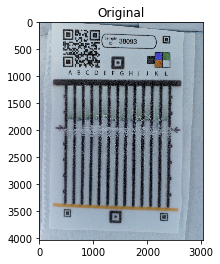

In [10]:
image = cv2.imread(str(image_filenames[0]), 1)
plot_image(image, title="Original")
edges, contours, hierarchy = find_contours(image, verbose=False)
markers = select_markers(contours, hierarchy, verbose=True, very_verbose=False)

Markers: [253, 260, 260, 260, 268, 268, 268, 274, 274, 274, 289, 371, 390, 390, 430, 430, 430, 629, 629, 675, 675, 675, 689, 689, 689]


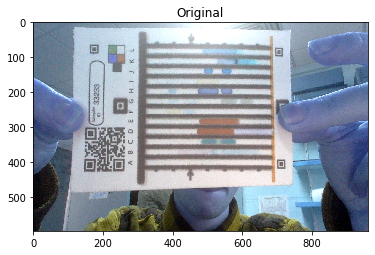

In [11]:
image = cv2.imread(r"C:\Users\ericc\projects\padtools\untracked\raw.jpg", 1)
plot_image(image, title="Original")
edges, contours, hierarchy = find_contours(image, verbose=False)
markers = select_markers(contours, hierarchy, verbose=True, very_verbose=False)

## Manual Box Placement

In [12]:
def extract_rgb_from_image(
    pathlib_filename,
    verbose=False
):
    if verbose:
        print(f"Reading: {str(pathlib_filename)}")
    matrix_of_pixels = cv2.imread(str(pathlib_filename))
    return matrix_of_pixels

In [13]:
def euclidean_distance_from_background(
    background_pixel_matrix,
    foreground_pixel_matrix
):
    pass

In [14]:
def sample_boxes(
    pathlib_filename,
    box_width=50,
    box_height=500,
    num_boxes=12,
    offset_top=1250,
    offset_left=560,
    horizontal_spacer=109,
    output_dir="output",
    background_pixel_matrix=None,
    do_subtraction=False,
    draw=True,
    verbose=False
):
    column_data = []
    if verbose:
        print("Reading: {}".format(str(pathlib_filename)))
    image = cv2.imread(str(pathlib_filename))
    if background_pixel_matrix is not None and do_subtraction:
        # print(" {} ".format(pathlib_filename.stem).center(79, '-'))
        # print("Background pixel [0, 0]: {}".format(background_pixel_matrix[0][0]))
        # print("Foreground pixel [0, 0]: {}".format(image[0][0]))
        image = image - background_pixel_matrix
        # print("Subtracted pixel [0, 0]: {}".format(image[0][0]))
    for x in range(num_boxes):
        # Define rectangle to sample.
        box_top_left_x = int(offset_left + horizontal_spacer * x + box_width * x)
        box_top_left_y = int(offset_top)
        box_bottom_right_x = int(box_top_left_x + box_width)
        box_bottom_right_y = int(offset_top + box_height)
        
        # Sample colors.
        pixels_in_box = image[box_top_left_y:box_bottom_right_y, box_top_left_x:box_bottom_right_x]
            
        average_color = pixels_in_box.mean(axis=0).mean(axis=0)

        # Not used, but this will save the cropped pixels used for sampling.
        # Would be cool to embed this into an output Excel.
        # cv2.imwrite("test.jpg", pixels_in_box)
        
        # Work out the date and time.
        _, date_string, time_string = pathlib_filename.stem.split('_')
        file_creation_date = datetime.strptime(date_string, "%Y%m%d")
        file_creation_time = datetime.strptime(time_string, "%H%M%S")
        file_creation_datetime = datetime.strptime(date_string + time_string, "%Y%m%d%H%M%S")
        
        # Additional color options.
        average_inverted_blue = 255 - average_color[0]
        average_inverted_green = 255 - average_color[1]
        average_inverted_red = 255 - average_color[2]
        grayscale_intensity = sum(average_color) / 3
        grayscale_intensity = (average_color[0] + average_color[1] + average_color[2]) / 3
        inverted_grayscale_intensity = 255 - grayscale_intensity
        
        # Save data from box.
        datum = {
            "Filename": str(pathlib_filename),
            "Column": x,
            "TopLeftX": box_top_left_x,
            "TopLeftY": box_top_left_y,
            "BottomRightX": box_bottom_right_x,
            "BottomRightY": box_bottom_right_y,
            "AverageBlue": average_color[0],
            "AverageGreen": average_color[1],
            "AverageRed": average_color[2],
            "AverageInvertedBlue": average_inverted_blue,
            "AverageInvertedGreen": average_inverted_green,
            "AverageInvertedRed": average_inverted_red,
            "GrayscaleIntensity": grayscale_intensity,
            "InvertedGrayscaleIntensity": inverted_grayscale_intensity,
            "Date": file_creation_date,
            "Time": file_creation_time,
            "Datetime": file_creation_datetime
        }
        column_data.append(datum)
        
        # If you want to draw.
        if draw:
            cv2.rectangle(
                image,
                (box_top_left_x, box_top_left_y),
                (box_bottom_right_x, box_bottom_right_y),
                (255, 0, 0),
                21
            )

    blue_described = pd.Series([x["AverageBlue"] for x in column_data]).describe()
    green_described = pd.Series([x["AverageGreen"] for x in column_data]).describe()
    red_described = pd.Series([x["AverageRed"] for x in column_data]).describe()
    
    inverted_blue_described = pd.Series([x["AverageInvertedBlue"] for x in column_data]).describe()
    inverted_green_described = pd.Series([x["AverageInvertedGreen"] for x in column_data]).describe()
    inverted_red_described = pd.Series([x["AverageInvertedRed"] for x in column_data]).describe()
    
    grayscale_intensity_described = pd.Series([x["GrayscaleIntensity"] for x in column_data]).describe()
    inverted_grayscale_intensity_described = pd.Series([x["InvertedGrayscaleIntensity"] for x in column_data]).describe()

    # Average of columns.
    summary_data = {
        "Filename": str(pathlib_filename),
        
        "BlueMean": blue_described["mean"],
        "BlueStd": blue_described["std"],
        "BlueMin": blue_described["min"],
        "Blue25%": blue_described["25%"],
        "Blue50%": blue_described["50%"],
        "Blue75%": blue_described["75%"],
        "BlueMax": blue_described["max"],
        
        "GreenMean": green_described["mean"],
        "GreenStd": green_described["std"],
        "GreenMin": green_described["min"],
        "Green25%": green_described["25%"],
        "Green50%": green_described["50%"],
        "Green75%": green_described["75%"],
        "GreenMax": green_described["max"],
        
        "RedMean": red_described["mean"],
        "RedStd": red_described["std"],
        "RedMin": red_described["min"],
        "Red25%": red_described["25%"],
        "Red50%": red_described["50%"],
        "Red75%": red_described["75%"],
        "RedMax": red_described["max"],
        
        "InvertedBlueMean": inverted_blue_described["mean"],
        "InvertedBlueStd": inverted_blue_described["std"],
        "InvertedBlueMin": inverted_blue_described["min"],
        "InvertedBlue25%": inverted_blue_described["25%"],
        "InvertedBlue50%": inverted_blue_described["50%"],
        "InvertedBlue75%": inverted_blue_described["75%"],
        "InvertedBlueMax": inverted_blue_described["max"],
        
        "InvertedGreenMean": inverted_green_described["mean"],
        "InvertedGreenStd": inverted_green_described["std"],
        "InvertedGreenMin": inverted_green_described["min"],
        "InvertedGreen25%": inverted_green_described["25%"],
        "InvertedGreen50%": inverted_green_described["50%"],
        "InvertedGreen75%": inverted_green_described["75%"],
        "InvertedGreenMax": inverted_green_described["max"],
        
        "InvertedRedMean": inverted_red_described["mean"],
        "InvertedRedStd": inverted_red_described["std"],
        "InvertedRedMin": inverted_red_described["min"],
        "InvertedRed25%": inverted_red_described["25%"],
        "InvertedRed50%": inverted_red_described["50%"],
        "InvertedRed75%": inverted_red_described["75%"],
        "InvertedRedMax": inverted_red_described["max"],
        
        "GrayscaleIntensityMean": grayscale_intensity_described["mean"],
        "GrayscaleIntensityStd": grayscale_intensity_described["std"],
        "GrayscaleIntensityMin": grayscale_intensity_described["min"],
        "GrayscaleIntensity25%": grayscale_intensity_described["25%"],
        "GrayscaleIntensity50%": grayscale_intensity_described["50%"],
        "GrayscaleIntensity75%": grayscale_intensity_described["75%"],
        "GrayscaleIntensityMax": grayscale_intensity_described["max"],
        
        "InvertedGrayscaleIntensityMean": inverted_grayscale_intensity_described["mean"],
        "InvertedGrayscaleIntensityStd": inverted_grayscale_intensity_described["std"],
        "InvertedGrayscaleIntensityMin": inverted_grayscale_intensity_described["min"],
        "InvertedGrayscaleIntensity25%": inverted_grayscale_intensity_described["25%"],
        "InvertedGrayscaleIntensity50%": inverted_grayscale_intensity_described["50%"],
        "InvertedGrayscaleIntensity75%": inverted_grayscale_intensity_described["75%"],
        "InvertedGrayscaleIntensityMax": inverted_grayscale_intensity_described["max"],
        
        "Date": file_creation_date,
        "Time": file_creation_time,
        "Datetime": file_creation_datetime
    }
            
    if draw:
        plt.figure()
        plt.title(pathlib_filename.stem)
        plt.imshow(image)
        output_filename = os.path.join(
            os.getcwd(),
            output_dir,
            pathlib_filename.stem + "_OUTPUT_20190317" + pathlib_filename.suffix
        )
        cv2.imwrite(output_filename, image)
        if verbose:
            print("Wrote: {}".format(output_filename))
    return column_data, summary_data

## Sample

### Without Background Subtraction

In [15]:
# column_data = []
# summary_data = []
# for image_filename in image_filenames:
#     column_data_from_this_file, summary_data_from_this_file = \
#         sample_boxes(
#             image_filename,
#             output_dir=OUTPUT_DIRECTORY,
#             box_width=BOX_WIDTH,
#             box_height=BOX_HEIGHT,
#             num_boxes=NUM_BOXES,
#             offset_left=OFFSET_LEFT,
#             offset_top=OFFSET_TOP,
#             horizontal_spacer=HORIZONTAL_SPACER,
#             verbose=False,
#             draw=True
#         )
#     column_data.extend(column_data_from_this_file)
#     summary_data.append(summary_data_from_this_file)

### With Background Subtraction

In [16]:
# first_image = image_filenames[0] # Should I pop instead?
# print(f"Background image: {first_image}")
# _background_pixel_matrix = extract_rgb_from_image(first_image)

In [17]:
# print("Other images:\n{}".format("\n".join([str(x) for x in image_filenames])))

In [18]:
# column_data = []
# summary_data = []
# for image_filename in image_filenames:
#     column_data_from_this_file, summary_data_from_this_file = \
#         sample_boxes(
#             image_filename,
#             output_dir=OUTPUT_DIRECTORY,
#             box_width=BOX_WIDTH,
#             box_height=BOX_HEIGHT,
#             num_boxes=NUM_BOXES,
#             offset_left=OFFSET_LEFT,
#             offset_top=OFFSET_TOP,
#             horizontal_spacer=HORIZONTAL_SPACER,
#             background_pixel_matrix=_background_pixel_matrix,
#             do_subtraction=True,
#             verbose=False,
#             draw=True
#         )
#     column_data.extend(column_data_from_this_file)
#     summary_data.append(summary_data_from_this_file)

In [19]:
# _background_pixel_matrix[0][0]

In [20]:
# _background_pixel_matrix[0][0]

In [21]:
# _background_pixel_matrix.astype('int16')

## Export to CSV

In [22]:
def create_column_data_frame(
    column_data,
    every_other_lane=False
):
    column_df = pd.DataFrame(column_data)
    column_df["TimeDelta"] = column_df["Time"] - column_df["Time"].min()
    column_df["TimeDelta"] = column_df["TimeDelta"].astype('timedelta64[s]')
    column_df = column_df[[
        "Filename",
        "Column",
        "TopLeftX",
        "TopLeftY",
        "BottomRightX",
        "BottomRightY",
        "AverageBlue",
        "AverageGreen",
        "AverageRed",
        "AverageInvertedBlue",
        "AverageInvertedGreen",
        "AverageInvertedRed",
        "GrayscaleIntensity",
        "InvertedGrayscaleIntensity",
        "Date",
        "Time",
        "Datetime",
        "TimeDelta" 
    ]]
    if every_other_lane:
        column_df = column_df.loc[column_df["Column"].isin([0, 2, 4, 6, 8, 10])]
    return column_data

In [23]:
def create_summary_data_frame(
    summary_data
):
    summary_df = pd.DataFrame(summary_data)
    summary_df["TimeDelta"] = summary_df["Time"] - summary_df["Time"].min()
    summary_df["TimeDelta"] = summary_df["TimeDelta"].astype('timedelta64[s]')
    summary_df = summary_df[[
        "Filename",

        "BlueMean",
        "BlueStd",
        "BlueMin",
        "Blue25%",
        "Blue50%",
        "Blue75%",
        "BlueMax",
        "GreenMean",
        "GreenStd",
        "GreenMin",
        "Green25%",
        "Green50%",
        "Green75%",
        "GreenMax",
        "RedMean",
        "RedStd",
        "RedMin",
        "Red25%",
        "Red50%",
        "Red75%",
        "RedMax",

        "InvertedBlueMean",
        "InvertedBlueStd",
        "InvertedBlueMin",
        "InvertedBlue25%",
        "InvertedBlue50%",
        "InvertedBlue75%",
        "InvertedBlueMax",

        "InvertedGreenMean",
        "InvertedGreenStd",
        "InvertedGreenMin",
        "InvertedGreen25%",
        "InvertedGreen50%",
        "InvertedGreen75%",
        "InvertedGreenMax",

        "InvertedRedMean",
        "InvertedRedStd",
        "InvertedRedMin",
        "InvertedRed25%",
        "InvertedRed50%",
        "InvertedRed75%",
        "InvertedRedMax",

        "GrayscaleIntensityMean",
        "GrayscaleIntensityStd",
        "GrayscaleIntensityMin",
        "GrayscaleIntensity25%",
        "GrayscaleIntensity50%",
        "GrayscaleIntensity75%",
        "GrayscaleIntensityMax",

        "InvertedGrayscaleIntensityMean",
        "InvertedGrayscaleIntensityStd",
        "InvertedGrayscaleIntensityMin",
        "InvertedGrayscaleIntensity25%",
        "InvertedGrayscaleIntensity50%",
        "InvertedGrayscaleIntensity75%",
        "InvertedGrayscaleIntensityMax",

        "Date",
        "Time",
        "Datetime",
        "TimeDelta"
    ]]
    return summary_df

In [24]:
# column_df = create_column_data_frame(column_data)
# column_df.to_csv(output_per_column_csv_path)

In [25]:
# summary_df = create_summary_data_frame(summary_data)
# summary_df.to_csv(output_per_file_csv_path)

## Plot Color Changes Over Time

In [26]:
# summary_df.head()

In [27]:
# fig, ax = plt.subplots();
# summary_df.plot(ax=ax, x="TimeDelta", y="BlueMean", yerr="BlueStd", capsize=3, color="blue");
# summary_df.plot(ax=ax, x="TimeDelta", y="RedMean", yerr="RedStd", capsize=3, color="red");
# summary_df.plot(ax=ax, x="TimeDelta", y="GreenMean", yerr="GreenStd", capsize=3, color="green");
# ax.set_title("Average Color Change Over Time");
# ax.set_ylabel("Intensity (0 - 255)");
# ax.set_xlabel("Time (s)");
# ax.set_xlim(
#     summary_df.iloc[0]["TimeDelta"] - PADDING_USED_ON_SIDES_OF_PLOTS,
#     summary_df.iloc[-1]["TimeDelta"] + PADDING_USED_ON_SIDES_OF_PLOTS
# );
# ax.legend(["Blue Mean", "Red Mean", "Green Mean"]);

In [28]:
# filename = output_dir / "average_color_intensity_over_time.png"
# fig.savefig(str(filename))

In [29]:
# fig, ax = plt.subplots();
# summary_df.plot(ax=ax, x="TimeDelta", y="InvertedBlueMean", yerr="InvertedBlueStd", capsize=3, color="blue");
# summary_df.plot(ax=ax, x="TimeDelta", y="InvertedRedMean", yerr="InvertedRedStd", capsize=3, color="red");
# summary_df.plot(ax=ax, x="TimeDelta", y="InvertedGreenMean", yerr="InvertedGreenStd", capsize=3, color="green");
# ax.set_title("Average Inverted Color Change Over Time");
# ax.set_ylabel("Intensity (0 - 255)");
# ax.set_xlabel("Time (s)");
# ax.set_xlim(
#     summary_df.iloc[0]["TimeDelta"] - PADDING_USED_ON_SIDES_OF_PLOTS,
#     summary_df.iloc[-1]["TimeDelta"] + PADDING_USED_ON_SIDES_OF_PLOTS
# );
# ax.legend(["Inverted Blue Mean", "Inverted Red Mean", "Inverted Green Mean"]);

In [30]:
# filename = output_dir / "average_inverted_color_intensity_over_time.png"
# fig.savefig(str(filename))

In [31]:
# fig, ax = plt.subplots();
# summary_df.plot(
#     ax=ax,
#     x="TimeDelta",
#     y="GrayscaleIntensityMean",
#     yerr="GrayscaleIntensityStd",
#     capsize=3,
#     color="gray",
#     legend=False
# );
# ax.set_title("Average Grayscale Intensity Over Time");
# ax.set_ylabel("Intensity (0 - 255)");
# ax.set_xlabel("Time (s)");
# ax.set_xlim(
#     summary_df.iloc[0]["TimeDelta"] - PADDING_USED_ON_SIDES_OF_PLOTS,
#     summary_df.iloc[-1]["TimeDelta"] + PADDING_USED_ON_SIDES_OF_PLOTS
# );

In [32]:
# filename = output_dir / "average_grayscale_intensity_over_time.png"
# fig.savefig(str(filename))

In [33]:
# fig, ax = plt.subplots();
# summary_df.plot(
#     ax=ax,
#     x="TimeDelta",
#     y="InvertedGrayscaleIntensityMean",
#     yerr="InvertedGrayscaleIntensityStd",
#     capsize=3,
#     color="gray",
#     legend=False
# );
# ax.set_title("Average Inverted Grayscale Intensity Over Time");
# ax.set_ylabel("Intensity (0 - 255)");
# ax.set_xlabel("Time (s)");
# ax.set_xlim(
#     summary_df.iloc[0]["TimeDelta"] - PADDING_USED_ON_SIDES_OF_PLOTS,
#     summary_df.iloc[-1]["TimeDelta"] + PADDING_USED_ON_SIDES_OF_PLOTS
# );

In [34]:
# filename = output_dir / "average_inverted_grayscale_intensity_over_time.png"
# fig.savefig(str(filename))